In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

%matplotlib inline
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

Load CSV files

In [2]:
divvyQ119 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q1.csv')
divvyQ219 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q2.csv')
divvyQ319 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q3.csv')
divvyQ419 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q4.csv')
divvyQ120 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2020_Q1.csv')
divvy0420 = pd.read_csv('../data/Chicago_Divvy/202004-divvy-tripdata.csv')
divvy0520 = pd.read_csv('../data/Chicago_Divvy/202005-divvy-tripdata.csv')
divvy0620 = pd.read_csv('../data/Chicago_Divvy/202006-divvy-tripdata.csv')
divvy0720 = pd.read_csv('../data/Chicago_Divvy/202007-divvy-tripdata.csv')
divvy0820 = pd.read_csv('../data/Chicago_Divvy/202008-divvy-tripdata.csv')
divvy0920 = pd.read_csv('../data/Chicago_Divvy/202009-divvy-tripdata.csv')
divvy1020 = pd.read_csv('../data/Chicago_Divvy/202010-divvy-tripdata.csv')
divvy1120 = pd.read_csv('../data/Chicago_Divvy/202011-divvy-tripdata.csv')
divvy1220 = pd.read_csv('../data/Chicago_Divvy/202012-divvy-tripdata.csv')
divvy0121 = pd.read_csv('../data/Chicago_Divvy/202101-divvy-tripdata.csv')
divvy0221 = pd.read_csv('../data/Chicago_Divvy/202102-divvy-tripdata.csv')
divvy0321 = pd.read_csv('../data/Chicago_Divvy/202103-divvy-tripdata.csv')
divvy0421 = pd.read_csv('../data/Chicago_Divvy/202104-divvy-tripdata.csv')
divvy0521 = pd.read_csv('../data/Chicago_Divvy/202105-divvy-tripdata.csv')

Choose Only Necessary Columns

In [3]:
divvy0121['start_station_id'].nunique()

638

In [4]:
divvyQ119 = divvyQ119[['trip_id', 'start_time', 'end_time', 'from_station_id', 'to_station_id']]
divvyQ219 = divvyQ219[['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time', '01 - Rental Details Local End Time', '03 - Rental Start Station ID', '02 - Rental End Station ID']]
divvyQ319 = divvyQ319[['trip_id', 'start_time', 'end_time', 'from_station_id', 'to_station_id']]
divvyQ419 = divvyQ419[['trip_id', 'start_time', 'end_time', 'from_station_id', 'to_station_id']]
divvyQ120 = divvyQ120[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0420 = divvy0420[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0520 = divvy0520[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0520 = divvy0520[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0620 = divvy0620[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0720 = divvy0720[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0820 = divvy0820[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0920 = divvy0920[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy1020 = divvy1020[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy1120 = divvy1120[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy1220 = divvy1220[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0121 = divvy0121[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0221 = divvy0221[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0321 = divvy0321[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0421 = divvy0421[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0521 = divvy0521[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]

Change Date Time

In [5]:
# def change_dt(df, start_col, end_col):
#     df[start_col] = pd.to_datetime(df[start_col], format='%Y-%m-%d')
#     df[end_col] = pd.to_datetime(df[end_col], format='%Y-%m-%d')
#     return df

In [6]:
# change_dt(divvyQ120, 'started_at', 'ended_at')

In [7]:
divvyQ119['start_time'] = pd.to_datetime(divvyQ119['start_time'], format='%Y-%m-%d')
divvyQ119['end_time'] = pd.to_datetime(divvyQ119['end_time'], format='%Y-%m-%d')

divvyQ219['01 - Rental Details Local Start Time'] = pd.to_datetime(divvyQ219['01 - Rental Details Local Start Time'], format='%Y-%m-%d')
divvyQ219['01 - Rental Details Local End Time'] = pd.to_datetime(divvyQ219['01 - Rental Details Local End Time'], format='%Y-%m-%d')

divvyQ319['start_time'] = pd.to_datetime(divvyQ319['start_time'], format='%Y-%m-%d')
divvyQ319['end_time'] = pd.to_datetime(divvyQ319['end_time'], format='%Y-%m-%d')

divvyQ419['start_time'] = pd.to_datetime(divvyQ419['start_time'], format='%Y-%m-%d')
divvyQ419['end_time'] = pd.to_datetime(divvyQ419['end_time'], format='%Y-%m-%d')

divvyQ120['started_at'] = pd.to_datetime(divvyQ120['started_at'], format='%Y-%m-%d')
divvyQ120['ended_at'] = pd.to_datetime(divvyQ120['ended_at'], format='%Y-%m-%d')

divvy0420['started_at'] = pd.to_datetime(divvy0420['started_at'], format='%Y-%m-%d')
divvy0420['ended_at'] = pd.to_datetime(divvy0420['ended_at'], format='%Y-%m-%d')

divvy0520['started_at'] = pd.to_datetime(divvy0520['started_at'], format='%Y-%m-%d')
divvy0520['ended_at'] = pd.to_datetime(divvy0520['ended_at'], format='%Y-%m-%d')

divvy0620['started_at'] = pd.to_datetime(divvy0620['started_at'], format='%Y-%m-%d')
divvy0620['ended_at'] = pd.to_datetime(divvy0620['ended_at'], format='%Y-%m-%d')

divvy0720['started_at'] = pd.to_datetime(divvy0720['started_at'], format='%Y-%m-%d')
divvy0720['ended_at'] = pd.to_datetime(divvy0720['ended_at'], format='%Y-%m-%d')

divvy0820['started_at'] = pd.to_datetime(divvy0820['started_at'], format='%Y-%m-%d')
divvy0820['ended_at'] = pd.to_datetime(divvy0820['ended_at'], format='%Y-%m-%d')

divvy0920['started_at'] = pd.to_datetime(divvy0920['started_at'], format='%Y-%m-%d')
divvy0920['ended_at'] = pd.to_datetime(divvy0920['ended_at'], format='%Y-%m-%d')

divvy1020['started_at'] = pd.to_datetime(divvy1020['started_at'], format='%Y-%m-%d')
divvy1020['ended_at'] = pd.to_datetime(divvy1020['ended_at'], format='%Y-%m-%d')

divvy1120['started_at'] = pd.to_datetime(divvy1120['started_at'], format='%Y-%m-%d')
divvy1120['ended_at'] = pd.to_datetime(divvy1120['ended_at'], format='%Y-%m-%d')

divvy1220['started_at'] = pd.to_datetime(divvy1220['started_at'], format='%Y-%m-%d')
divvy1220['ended_at'] = pd.to_datetime(divvy1220['ended_at'], format='%Y-%m-%d')

divvy0121['started_at'] = pd.to_datetime(divvy0121['started_at'], format='%Y-%m-%d')
divvy0121['ended_at'] = pd.to_datetime(divvy0121['ended_at'], format='%Y-%m-%d')

divvy0221['started_at'] = pd.to_datetime(divvy0221['started_at'], format='%Y-%m-%d')
divvy0221['ended_at'] = pd.to_datetime(divvy0221['ended_at'], format='%Y-%m-%d')

divvy0321['started_at'] = pd.to_datetime(divvy0321['started_at'], format='%Y-%m-%d')
divvy0321['ended_at'] = pd.to_datetime(divvy0321['ended_at'], format='%Y-%m-%d')

divvy0421['started_at'] = pd.to_datetime(divvy0421['started_at'], format='%Y-%m-%d')
divvy0421['ended_at'] = pd.to_datetime(divvy0421['ended_at'], format='%Y-%m-%d')

divvy0521['started_at'] = pd.to_datetime(divvy0521['started_at'], format='%Y-%m-%d')
divvy0521['ended_at'] = pd.to_datetime(divvy0521['ended_at'], format='%Y-%m-%d')

Rename Columns for Merge

In [8]:
divvyQ119.rename(columns={'trip_id':'ride_id', 'start_time': 'started_at', 'end_time':'ended_at', 'from_station_id':'start_station_id', 'to_station_id':'end_station_id'}, inplace=True)
divvyQ219.rename(columns={'01 - Rental Details Rental ID':'ride_id', '01 - Rental Details Local Start Time': 'started_at', '01 - Rental Details Local End Time':'ended_at', '03 - Rental Start Station ID':'start_station_id', '02 - Rental End Station ID':'end_station_id'}, inplace=True)
divvyQ319.rename(columns={'trip_id':'ride_id', 'start_time': 'started_at', 'end_time':'ended_at', 'from_station_id':'start_station_id', 'to_station_id':'end_station_id'}, inplace=True)
divvyQ419.rename(columns={'trip_id':'ride_id', 'start_time': 'started_at', 'end_time':'ended_at', 'from_station_id':'start_station_id', 'to_station_id':'end_station_id'}, inplace=True)

In [9]:
divvyQ219.head()

,ride_id,started_at,ended_at,start_station_id,end_station_id
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,81,56
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,317,59
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,283,174
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,26,133
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,202,129


Concatenate All DFs

In [10]:
all_divvy = pd.concat([divvyQ119, divvyQ219, divvyQ319, divvyQ419, divvyQ120, divvy0420, divvy0520, divvy0620, divvy0720, divvy0820, divvy0920, divvy1020, divvy1120, divvy1220, divvy0121, divvy0221, divvy0321, divvy0421, divvy0521])

In [11]:
all_divvy['start_station_id'].nunique()

1362

In [12]:
divvy0521

,ride_id,started_at,ended_at,start_station_id,end_station_id
0,C809ED75D6160B2A,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN
1,DD59FDCE0ACACAF3,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN
2,0AB83CB88C43EFC2,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN
3,7881AC6D39110C60,2021-05-30 14:25:51,2021-05-30 14:41:04,NaN,NaN
4,853FA701B4582BAF,2021-05-30 18:15:39,2021-05-30 18:22:32,NaN,NaN
...,...,...,...,...,...
531628,EF56D7D1D612AC11,2021-05-20 16:32:14,2021-05-20 16:35:39,13398,NaN
531629,745191CB9F21DE3C,2021-05-29 16:40:37,2021-05-29 17:22:37,TA1307000107,13042
531630,428575BAA5356BFF,2021-05-31 14:24:54,2021-05-31 14:31:38,TA1307000107,NaN
531631,FC8A4A7AB7249662,2021-05-25 16:01:33,2021-05-25 16:07:37,TA1307000107,NaN


Create Duration Column

In [13]:
all_divvy['duration'] = all_divvy['ended_at'] - all_divvy['started_at']

In [14]:
all_divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8603502 entries, 0 to 531632
Data columns (total 6 columns):
 #   Column            Dtype          
---  ------            -----          
 0   ride_id           object         
 1   started_at        datetime64[ns] 
 2   ended_at          datetime64[ns] 
 3   start_station_id  object         
 4   end_station_id    object         
 5   duration          timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 459.5+ MB


Filter Out Data

In [15]:
all_divvy = all_divvy.dropna(subset=['start_station_id'])
all_divvy = all_divvy.dropna(subset=['end_station_id'])
all_divvy = all_divvy[~((all_divvy['start_station_id'] == all_divvy['end_station_id']) & (all_divvy['duration'] < '00:05:00'))]

Create Date Column

In [16]:
all_divvy['start_date'] = all_divvy['started_at'].dt.date

In [17]:
divvy_by_date = all_divvy.groupby('start_date').agg({'ride_id': 'count'}).reset_index()
divvy_by_date['start_date'] = pd.to_datetime(divvy_by_date['start_date'], format='%Y-%m-%d')
divvy_by_date.rename(columns={'start_date': 'ride_date', 'ride_id':'ride_count'}, inplace=True)

# divvy_by_date_1 = all_divvy.groupby(['start_date'])['ride_id'].count()
# divvy_by_date_1 = pd.DataFrame(divvy_by_date_1).reset_index()
# divvy_by_date_1['start_date'] = pd.to_datetime(divvy_by_date_1['start_date'], format='%Y-%m-%d')
# divvy_by_date_1.columns=[['ride_date', 'ride_count']]

In [18]:
divvy_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ride_date   880 non-null    datetime64[ns]
 1   ride_count  880 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 KB


In [19]:
divvy_by_date['month'] = divvy_by_date['ride_date'].dt.month
divvy_by_date['mm-dd'] = divvy_by_date['ride_date'].dt.strftime('%m-%d')
# df['MM-DD'] = df['date'].dt.strftime('%m-%d')
divvy_by_date['year'] = divvy_by_date['ride_date'].dt.year
divvy_by_date['m_y'] = divvy_by_date['month'].apply(str) + "-" + divvy_by_date['year'].apply(str) 

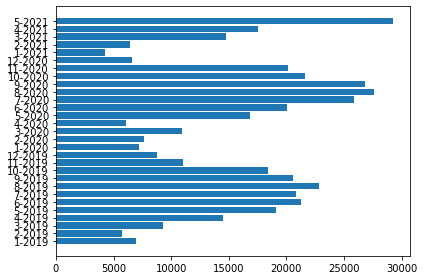

In [20]:
plt.barh('m_y', 'ride_count', data=divvy_by_date)
plt.tight_layout()

Save to a CSV

In [21]:
divvy_by_date.to_csv('../data/By_Date/divvy_by_date.csv')

Determine Day of Week

In [22]:
divvy_by_date['day_of_week'] = divvy_by_date['ride_date'].dt.weekday

Create Function to determine weekday or weekend

In [23]:
def week_day(row):
    if row in(0,1,2,3,4):
        return 'weekday'
    else:
        return 'weekend'

divvy_by_date['day_type'] = divvy_by_date['day_of_week'].apply(lambda row: week_day(row))
# df['race_label'] = df.apply (lambda row: label_race(row), axis=1)

In [24]:
divvy_by_date

,ride_date,ride_count,month,mm-dd,year,m_y,day_of_week,day_type
0,2019-01-01,1298,1,01-01,2019,1-2019,1,weekday
1,2019-01-02,4158,1,01-02,2019,1-2019,2,weekday
2,2019-01-03,5605,1,01-03,2019,1-2019,3,weekday
3,2019-01-04,6771,1,01-04,2019,1-2019,4,weekday
4,2019-01-05,6145,1,01-05,2019,1-2019,5,weekend
...,...,...,...,...,...,...,...,...
875,2021-05-27,9501,5,05-27,2021,5-2021,3,weekday
876,2021-05-28,5565,5,05-28,2021,5-2021,4,weekday
877,2021-05-29,17626,5,05-29,2021,5-2021,5,weekend
878,2021-05-30,22124,5,05-30,2021,5-2021,6,weekend


In [25]:
divvy_by_date_2019 = divvy_by_date[divvy_by_date['year'] == 2019]

In [26]:
divvy_by_date_2019['mm-dd'] = pd.to_datetime(divvy_by_date_2019['mm-dd'], format='%m-%d')

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
total_month = divvy_by_date.groupby('m_y').agg({'ride_count':'sum'})
divvy_by_date_day = divvy_by_date.groupby(['m_y', 'day_type']).agg({'ride_count':'sum'})

In [28]:
total_month.head()

,ride_count
m_y,
1-2019,102919
1-2020,142432
1-2021,82169
10-2019,370750
10-2020,332230


In [29]:
divvy_by_date_day.head()

ride_count
m_y    day_type            
1-2019 weekday        87178
       weekend        15741
1-2020 weekday       127459
       weekend        14973
1-2021 weekday        58501

In [30]:
divvy_by_date_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ride_date    365 non-null    datetime64[ns]
 1   ride_count   365 non-null    int64         
 2   month        365 non-null    int64         
 3   mm-dd        365 non-null    datetime64[ns]
 4   year         365 non-null    int64         
 5   m_y          365 non-null    object        
 6   day_of_week  365 non-null    int64         
 7   day_type     365 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 25.7+ KB


In [31]:
divvy_by_date_2019

,ride_date,ride_count,month,mm-dd,year,m_y,day_of_week,day_type
0,2019-01-01,1298,1,1900-01-01,2019,1-2019,1,weekday
1,2019-01-02,4158,1,1900-01-02,2019,1-2019,2,weekday
2,2019-01-03,5605,1,1900-01-03,2019,1-2019,3,weekday
3,2019-01-04,6771,1,1900-01-04,2019,1-2019,4,weekday
4,2019-01-05,6145,1,1900-01-05,2019,1-2019,5,weekend
...,...,...,...,...,...,...,...,...
360,2019-12-27,3969,12,1900-12-27,2019,12-2019,4,weekday
361,2019-12-28,2765,12,1900-12-28,2019,12-2019,5,weekend
362,2019-12-29,3886,12,1900-12-29,2019,12-2019,6,weekend
363,2019-12-30,3299,12,1900-12-30,2019,12-2019,0,weekday


ValueError: x and y must have same first dimension, but have shapes (1,) and (365,)

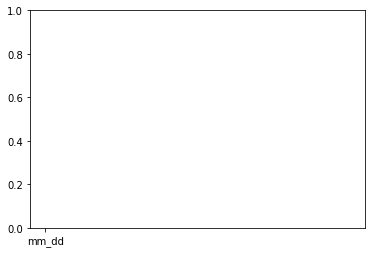

In [32]:
plt.plot('mm_dd', 'ride_count', data=divvy_by_date_2019)
display(divvy_by_date_2019)